# Bank Customer Churn Prediction

Hello GDSC members! 🤓🤓

After doing EDA, we are ready to start building a machine learning model for prediction bank customer churn! 😃

In this notebook, we will learn how to build machine learning models, evaluate our models, deal with underfitting and overfitting, improve the model's performance, perform hyperparameter tuning and finally export our pipeline and load it.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

plt.style.use('Solarize_Light2')

In [2]:
random_state = 42

data = pd.read_csv('data/churn.csv')
data.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df = data.copy()
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Split Data
In machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data.

In [4]:
from sklearn.model_selection import train_test_split

X, y = df.drop('Exited', axis=1), df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## Encoding
One of the most important parts of **preprocessing** is **Encoding**.

Encoding is the transformation of categorical variables to binary or numerical counterparts. An example is to treat male or female for gender as 0 or 1. Most of the machine learning algorithms require data encoding before training as they deal only with numerical values.

There are mainly two parts of encoding:

    - Ordinal Encoding: An ordinal encoding involves mapping each unique label to an integer value.
    - One-Hot Encoding: In this type of encoding, the original categorical feature is deleted and one new binary variable is added for each unique category of the feature.
    
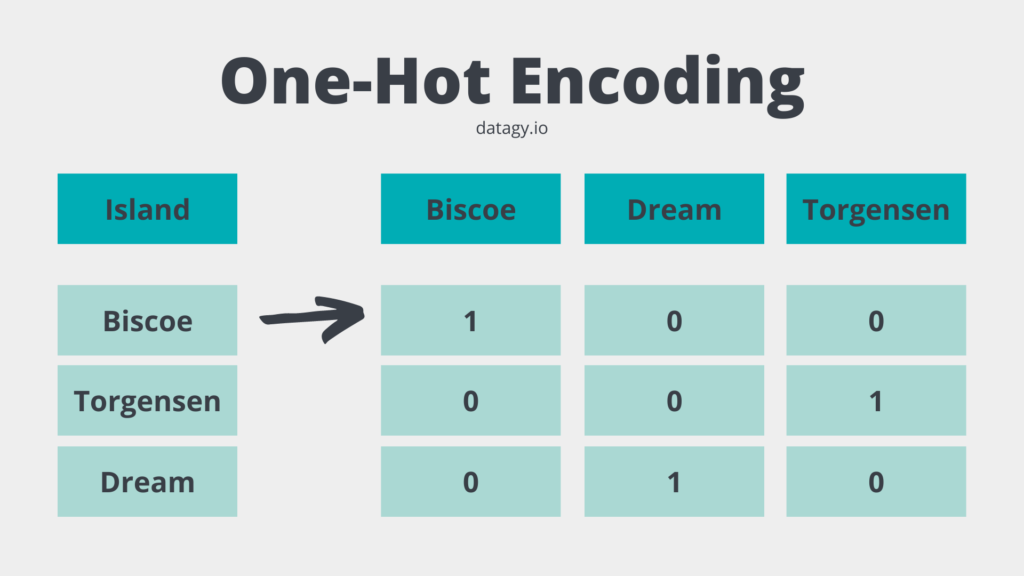

In [5]:
def preprocess_data(data):
    # Encode Geography and Gender features (Ordinal Encoding)
    df = data.copy()
    df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
    df['Gender'] = df['Gender'].map(lambda gender: (gender == 'Female') * 1)
    return df

X_train_preprocessed = preprocess_data(X_train)
X_test_preprocessed = preprocess_data(X_test)

## Train model

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_preprocessed, y_train)
train_prediction = model.predict(X_train_preprocessed)
test_prediction = model.predict(X_test_preprocessed)

## Model Evaluation

### Accuracy:
Accuracy is one metric for evaluating classification models.
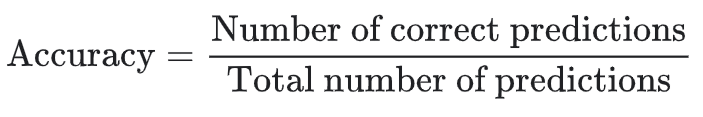

Let's check our model's accuracy on the training and testing sets

In [7]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, test_prediction)

print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {test_accuracy}')

Training accuracy: 1.0
Testing accuracy: 0.785


Our classes are unbalanced (79.6% negative and 20.4% positive), which makes accuracy a poor metric choice for model evaluation.

In [8]:
# predicting all negative already gives higher testing accuracy than our model

zeros_prediction = np.zeros_like(y_test)
zeros_accuracy = accuracy_score(y_test, zeros_prediction)
print(f'Predicting all zeros accuracy on the testing set: {zeros_accuracy}')

Predicting all zeros accuracy on the testing set: 0.8035


### True vs. False and Positive vs. Negative:
A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a **true negative** is an outcome where the model correctly predicts the negative class.

A **false positive** is an outcome where the model incorrectly predicts the positive class. And a **false negative** is an outcome where the model incorrectly predicts the negative class.

### Confusion Matrix:
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

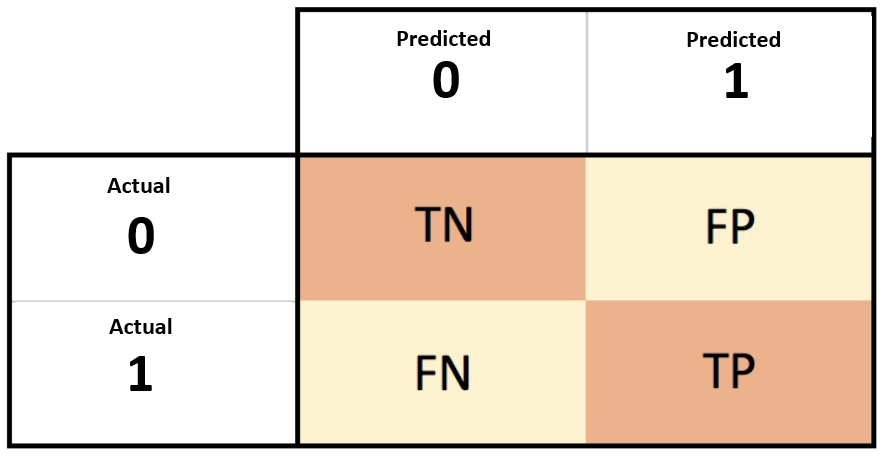

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

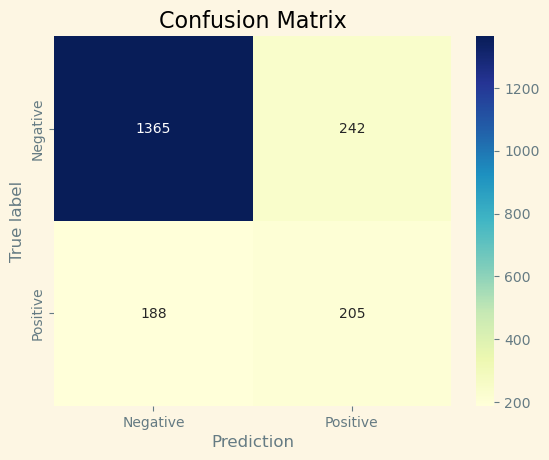

In [10]:
matrix = confusion_matrix(y_test, test_prediction)
matrix = pd.DataFrame(matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

sns.heatmap(matrix, annot=True, fmt='', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

We can use the confusion matrix to evaluate our model's performance. Using the values of true positive, false positive and false negative, we can calculate the values of two other metrics: **Precision** and **Recall**.

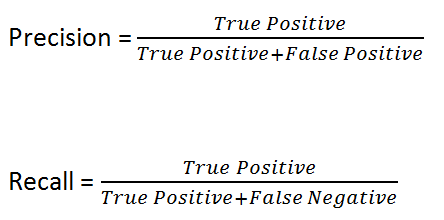


In pattern recognition, information retrieval, object detection and classification (machine learning), precision and recall are performance metrics that apply to data retrieved from a collection, corpus or sample space.

**Precision** (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while **recall** (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

In [11]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



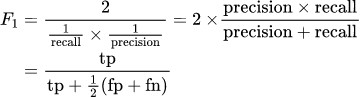

### F-score:
An F-score is the harmonic mean of a system’s precision and recall values. Criticism around the use of F-score values to determine the quality of a predictive system is based on the fact that a moderately high F-score can be the result of an imbalance between precision and recall and, therefore, not tell the whole story. On the other hand, systems at a high level of accuracy struggle to improve precision or recall without negatively impacting the other.

Critical (risk) applications that value information retrieval more than accuracy (i.e., producing a large number of false positives but virtually guaranteeing that all the true positives are found) can adopt a different scoring system called F2 measure, where recall is weighed more heavily. The opposite (precision is weighed more heavily) is achieved by using the F0.5 measure.

We will use **f2-score** as our metric for our models' evaluation

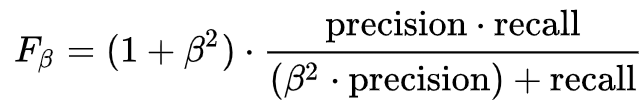
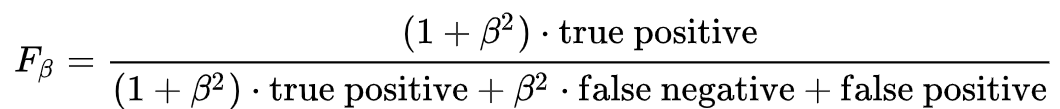

(beta = 2)

In [12]:
from sklearn.metrics import fbeta_score

f2_score = lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2)



train_f2 = f2_score(y_train, train_prediction)
test_f2 = f2_score(y_test, test_prediction)

print(f'f2-score on the training set: {train_f2}')
print(f'f2-score on the testing _set: {test_f2}')

f2-score on the training set: 1.0
f2-score on the testing _set: 0.5076770678553739


Like in the case of accuracy, our model has good performance (high f2-score) on the training set, and a bad performance (low f2-score) on the testing set.

This is called **overfitting**, and it is the main reason for splitting our data to a training set and a testing set.

### Overfitting:
Overfitting refers to a model that models the training data too well. It occurs when the model cannot generalize and fits too closely to the training dataset instead.

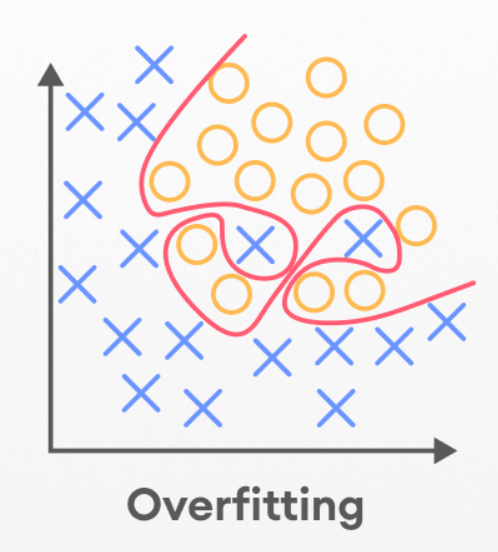

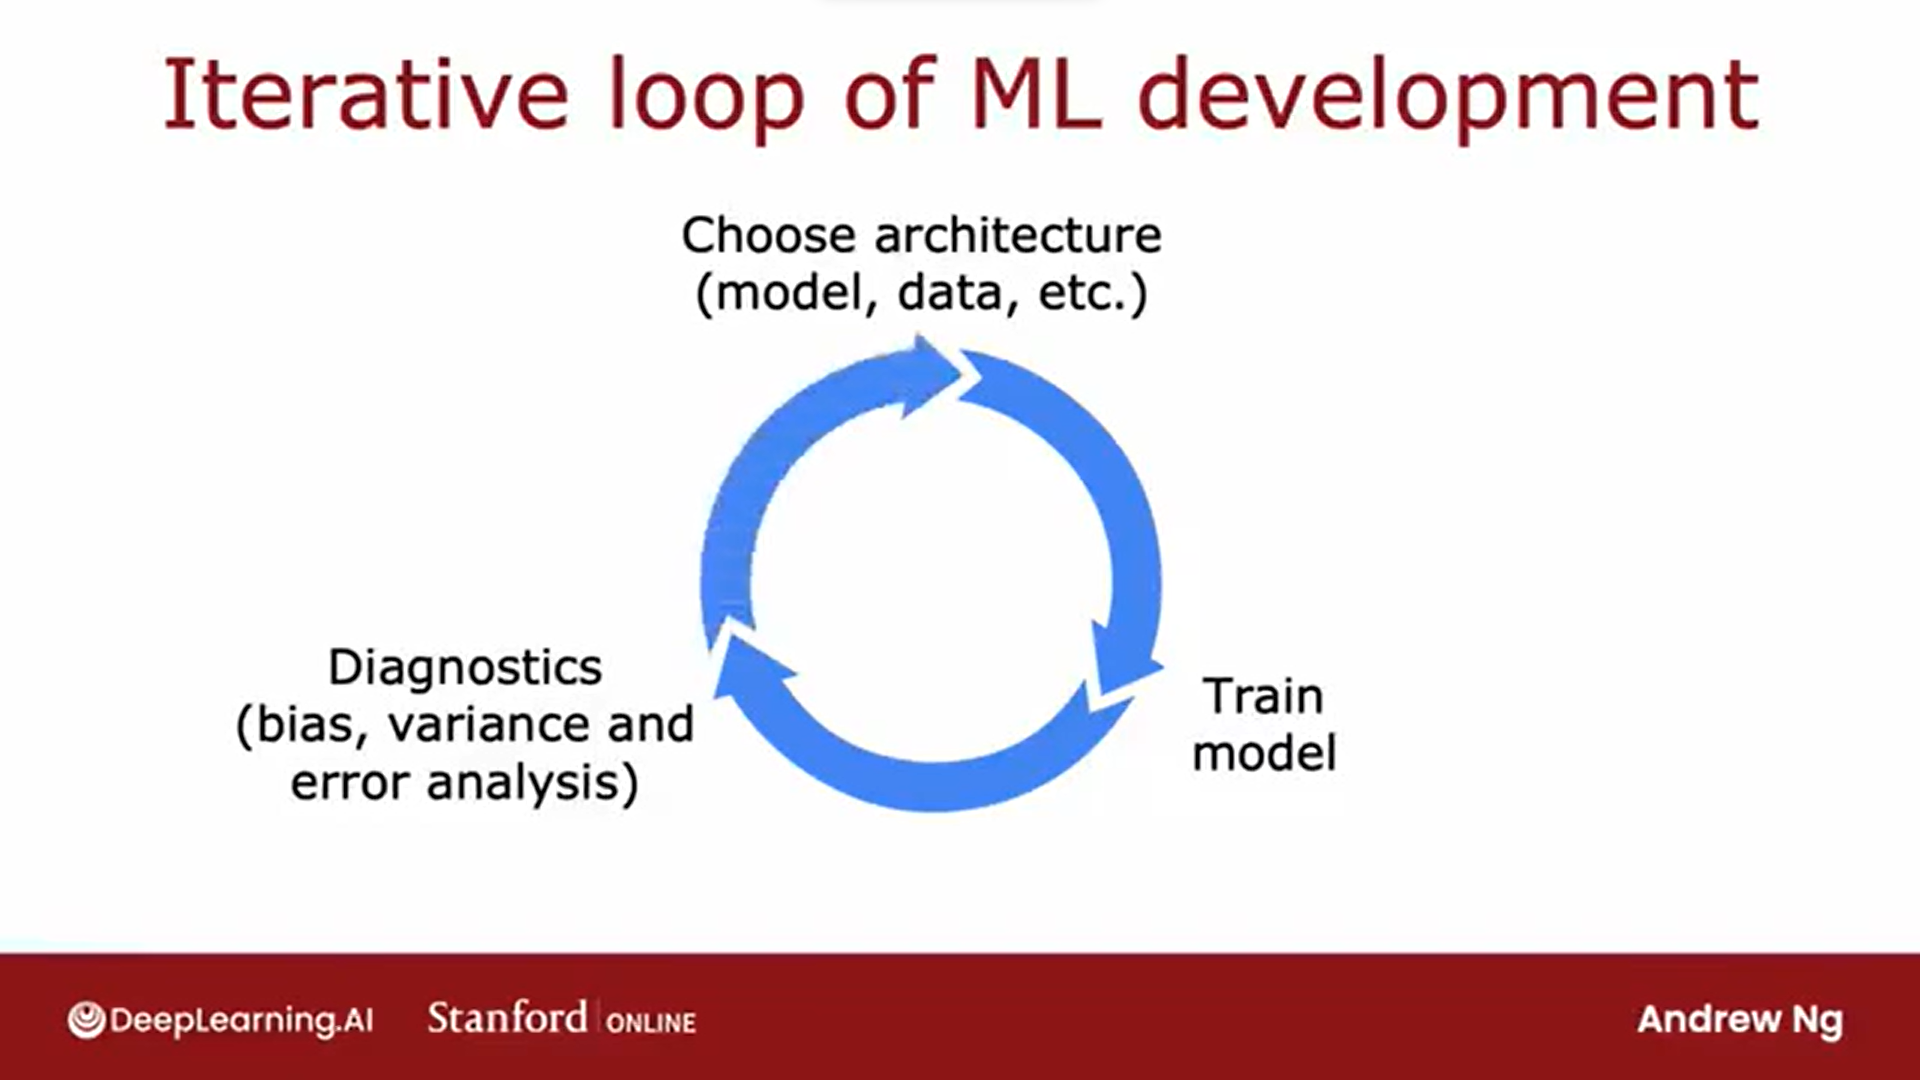

This iterative process can sometimes cause our model to "overfit" to our testing set, that is why we can split our data to 3 instead of 2 sets:

    - Training set: used to train the model.
    - Validation / Development set: used to tune the parameters of a model, for example to choose the number of hidden units in a neural network.
    - Testing set: used only to assess the performance of a fully-specified classifier.
    
An alternative to this approach is the use of **cross-validation**

### Cross-validation:
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.
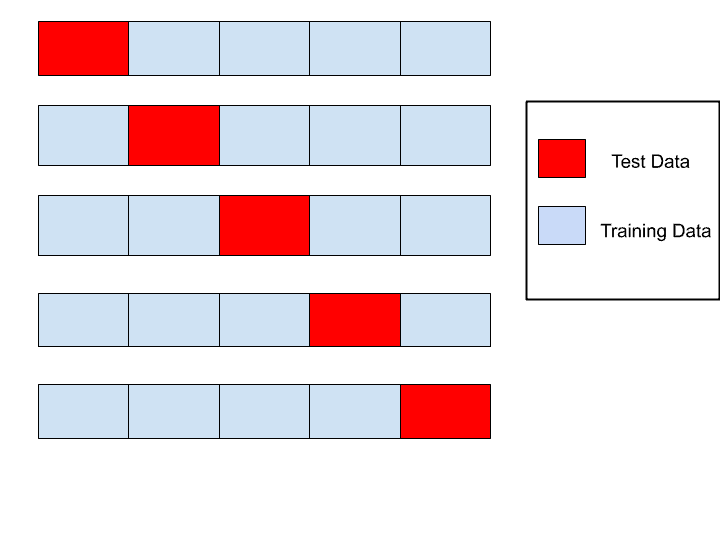

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

f2_scorer = make_scorer(f2_score, greater_is_better=True)

model = DecisionTreeClassifier()

scores = cross_validate(model, X_train_preprocessed, y_train, cv=5, scoring=f2_scorer, return_train_score=True)
scores

{'fit_time': array([0.02199888, 0.02098966, 0.02150965, 0.02099967, 0.02001119]),
 'score_time': array([0.00200081, 0.00200057, 0.00200558, 0.00200176, 0.00198865]),
 'test_score': array([0.51164216, 0.48309179, 0.51785714, 0.52847915, 0.4842615 ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [14]:
train_scores = scores['train_score']
validation_scores = scores['test_score']

print(f'Average training f2-score on 5-fold cv: {train_scores.mean()}')
print(f'Average validation f2-score on 5-fold cv: {validation_scores.mean()}')

Average training f2-score on 5-fold cv: 1.0
Average validation f2-score on 5-fold cv: 0.5050663485607017


Cross-Validation gives a better estimation for the model's performance.

### Learning Curve:
The learning curve is another powerful tool for model evaluation. It is a plot of model learning performance over experience or time.

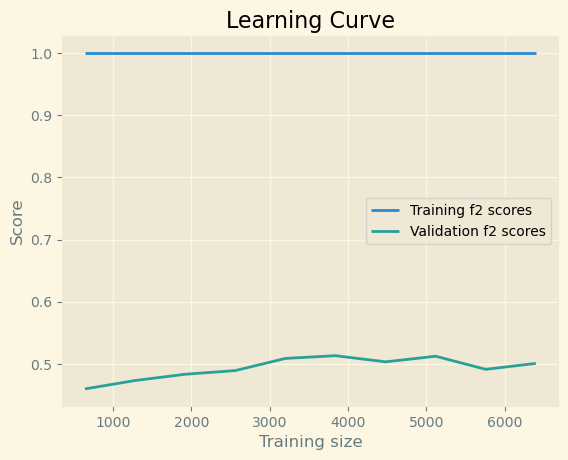

In [15]:
from sklearn.model_selection import learning_curve

model = DecisionTreeClassifier()

def plot_learning_curve(model, X, y, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]):

    k, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes,
                                                  cv=5, shuffle=True, random_state=random_state, scoring=f2_scorer)

    plt.plot(k, train_scores.mean(axis=1))
    plt.plot(k, test_scores.mean(axis=1))
    plt.legend(['Training f2 scores', 'Validation f2 scores'])
    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.show()
    
plot_learning_curve(model, X_train_preprocessed, y_train)

The huge gap between the training scores and the validation scores in the plot is an **overfitting** sign, so how can we deal with overfitting?

    - Train with more data
    - Data Augmentation
    - Addition of noise to the input data
    - Feature Selection
    - Changing the model's parameters to decrease its complexity (regularization, tree depth, number of layers..)
    - Ensembling
    - Early Stopping for models with iterative training methods

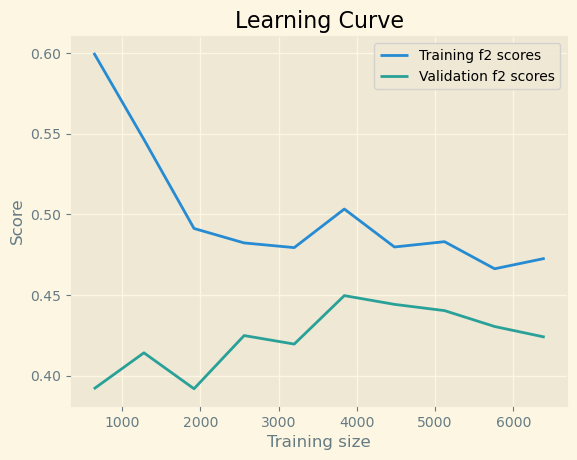

Average training f2-score on 5-fold cv: 0.47271676303929633
Average validation f2-score on 5-fold cv: 0.42366683110681363


In [16]:
# Let's try setting max_depth=6 to prevent our decision tree from overfitting

def evaluate_model(model, X, y, plot=True):
    if plot:
        plot_learning_curve(model, X, y)
    scores = cross_validate(model, X, y, cv=5, scoring=f2_scorer, return_train_score=True)
    train_scores = scores['train_score']
    validation_scores = scores['test_score']
    print(f'Average training f2-score on 5-fold cv: {train_scores.mean()}')
    print(f'Average validation f2-score on 5-fold cv: {validation_scores.mean()}')

model = DecisionTreeClassifier(max_depth=6)

evaluate_model(model, X_train_preprocessed, y_train)

We got rid of overfitting, but the validation score dropped slightly -> this is known as **Underfitting**. Did we decrease model complexity too much?

### Underfitting:
Underfitting is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training set and unseen data.

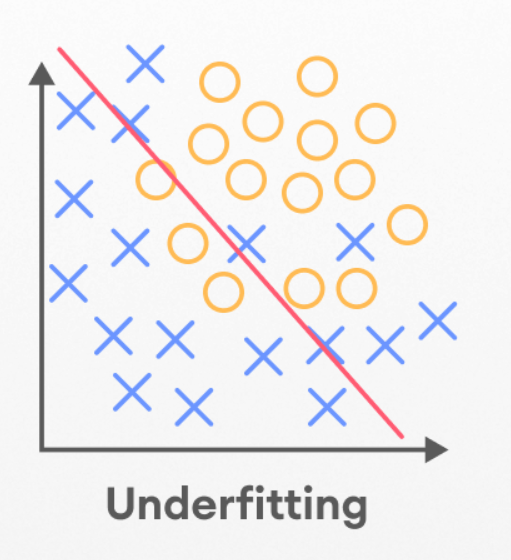

Ways to tackle underfitting:

    - Increase the number of features in the dataset.
    - Increase model complixity.
    - Reduce noise in the data.
    - Increase the duration of training (more iterations).

This underfitting is probably due to our unbalanced data

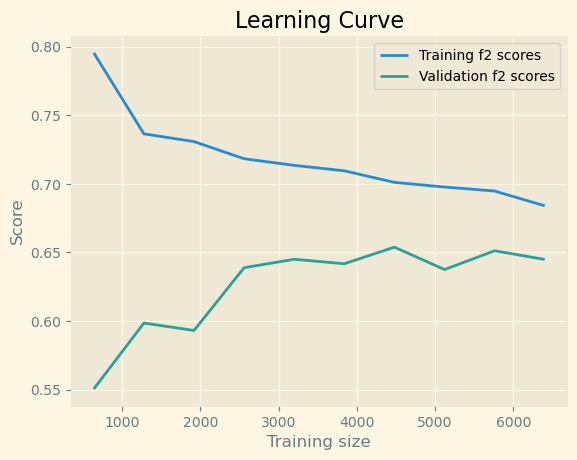

Average training f2-score on 5-fold cv: 0.6840414963462466
Average validation f2-score on 5-fold cv: 0.6447577782344126


In [17]:
# Let's set class_weight='balanced' to deal with unbalanced classes problem

model = DecisionTreeClassifier(max_depth=6, class_weight='balanced')

evaluate_model(model, X_train_preprocessed, y_train)

## K-Nearest Neighbors
The primary assumption that a KNN model makes is that data points/instances which exist in close proximity to each other are highly similar, while if a data point is far away from another group it's dissimilar to those data points. A KNN model calculates similarity using the distance between two points on a graph.

This assumption probababy hurts the performance
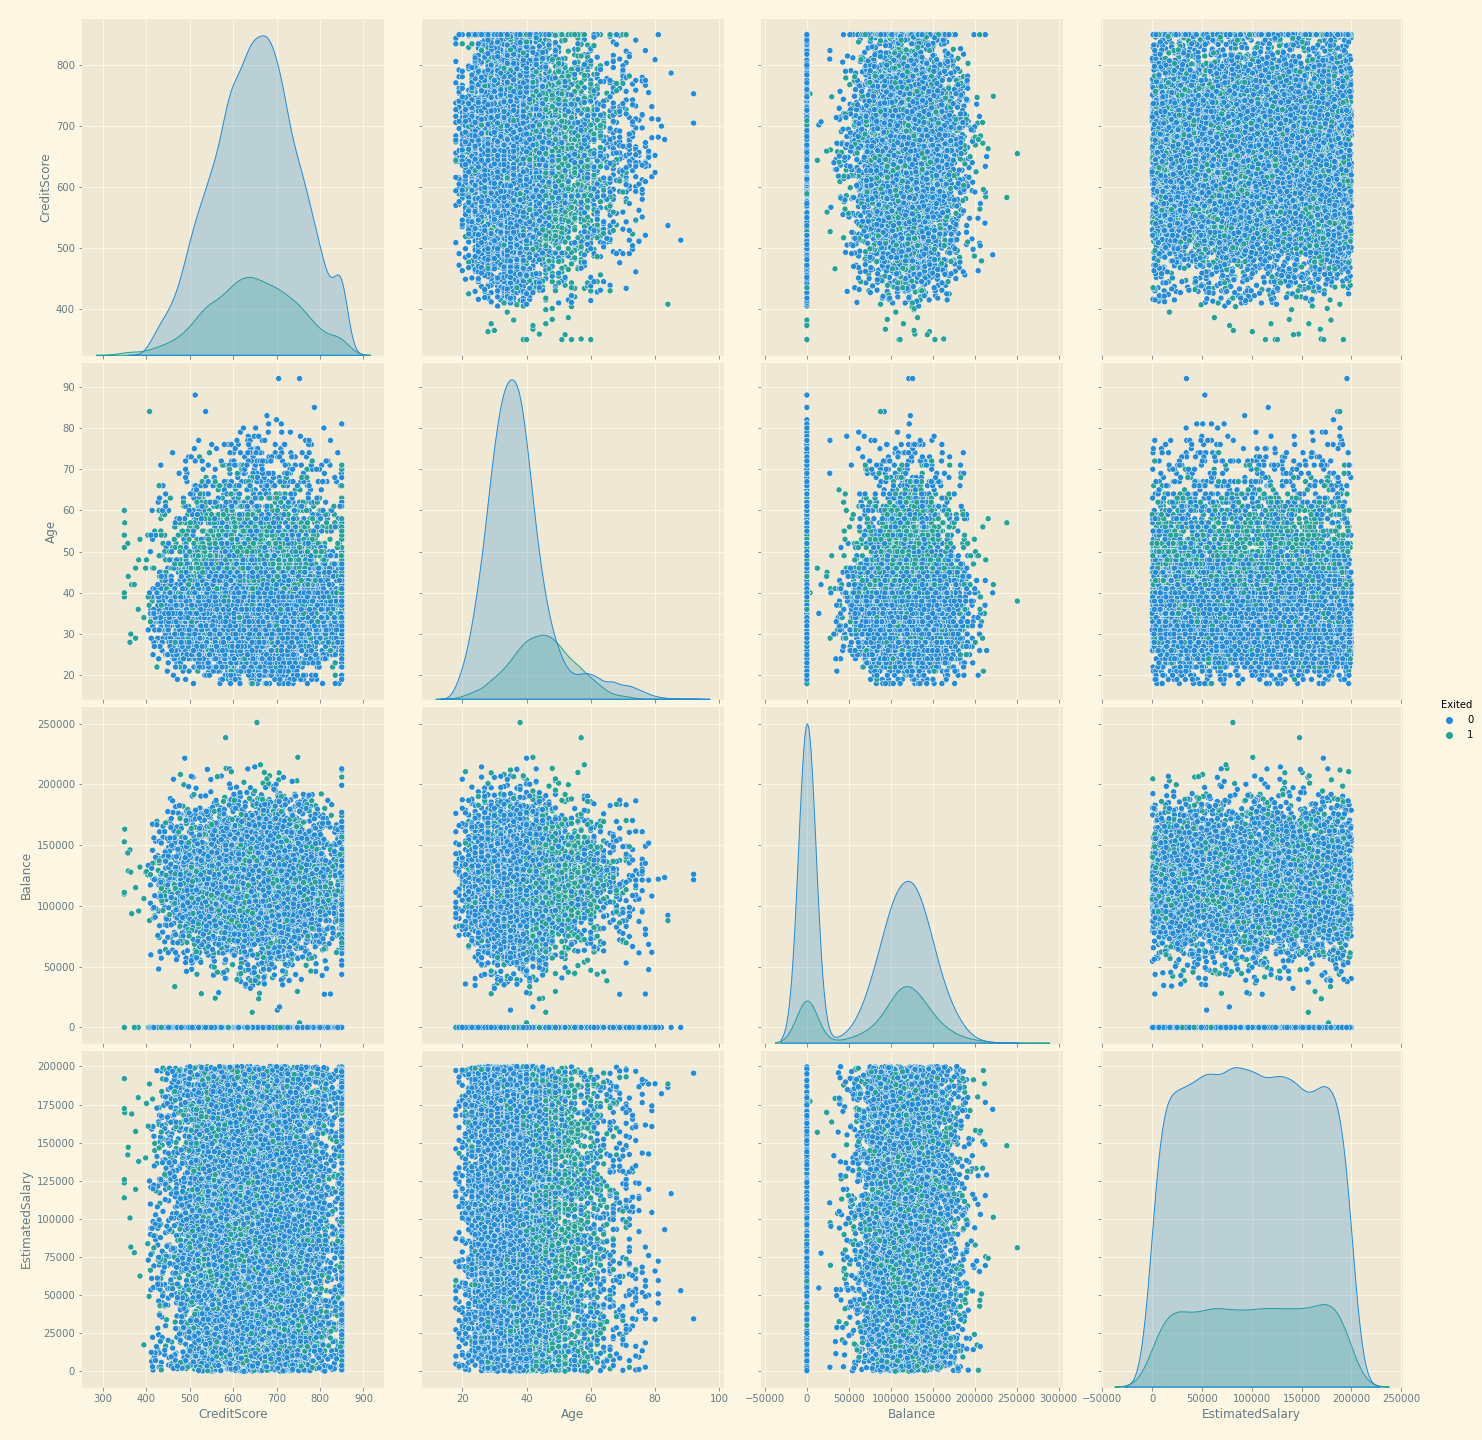

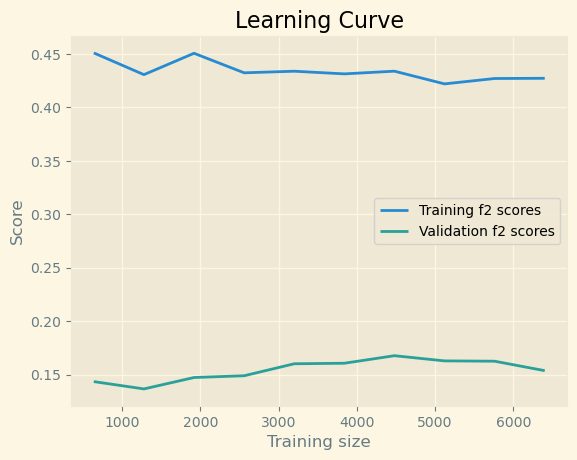

Average training f2-score on 5-fold cv: 0.4273337197781399
Average validation f2-score on 5-fold cv: 0.153725355794964


In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

evaluate_model(model, X_train_preprocessed, y_train)

K-Nearest Neighbors algorithm uses distance between points in the training set to make predictions -> The scaling of variables is very important.
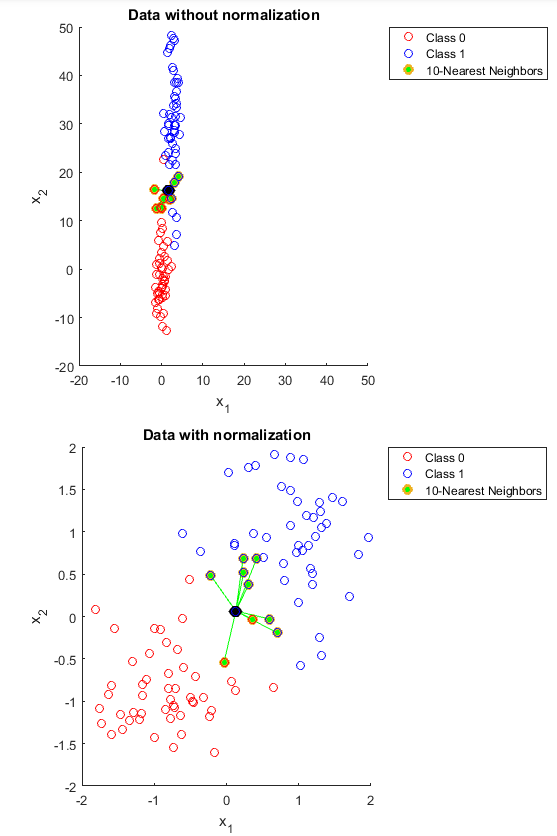

### Scaling:
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Scikit-learn offers multiple choices for scaling:
#### MinMaxScaler:
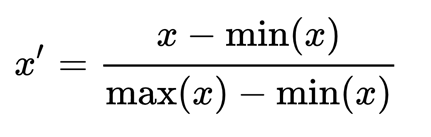

#### StandardScaler:
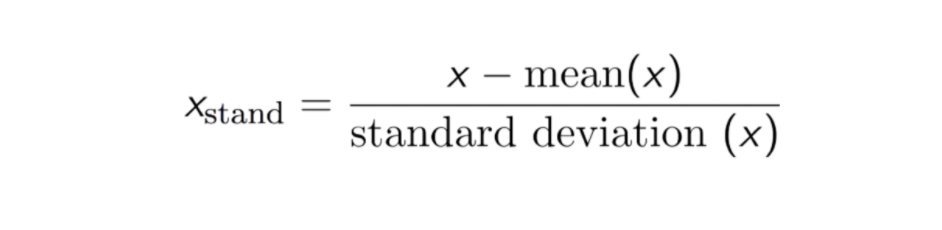

#### RobustScaler:
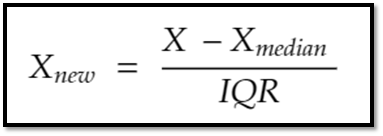

IQR = Interquartile range

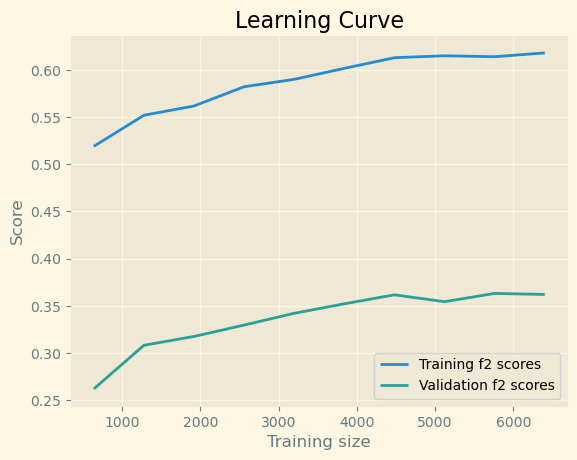

Average training f2-score on 5-fold cv: 0.6180390003286019
Average validation f2-score on 5-fold cv: 0.3620352630451282


In [19]:
# We will use sklearn's pipeline and MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

model = KNeighborsClassifier(n_neighbors=3)
scaler = MinMaxScaler()

pipe = make_pipeline(scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

The performance is better after scaling the variables, but now we have a problem of overfitting. Increasing the value of n_neighbors parameter may help the model generalize better to new data.

## Hyperparameter tuning
Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

We can manually search for the optimal hyperparameters, but we will use scikit-learn's GridSearchCV, which tries every possible combination to find the set of optimal hyperparameter values.

In [20]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
scaler = MinMaxScaler()

pipe = make_pipeline(scaler, model)

param_grid = {'kneighborsclassifier__n_neighbors': range(1, 15),
             'kneighborsclassifier__weights': ['uniform', 'distance']}

grid_search = GridSearchCV(pipe, param_grid, scoring=f2_scorer, return_train_score=True, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             return_train_score=True, scoring=make_scorer(<lambda>), verbose=1)

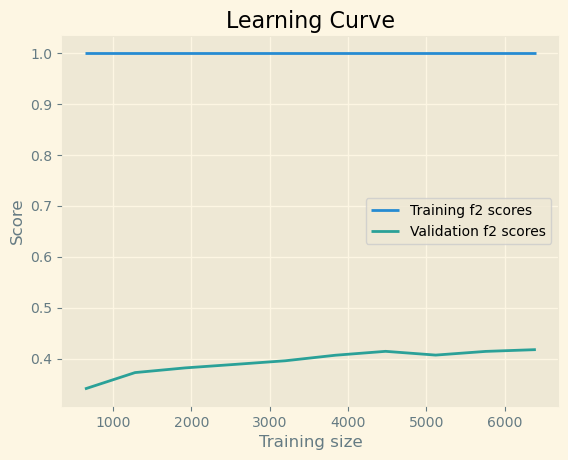

Average training f2-score on 5-fold cv: 1.0
Average validation f2-score on 5-fold cv: 0.41753538711137966


In [21]:
pipe = grid_search.best_estimator_

evaluate_model(pipe, X_train_preprocessed, y_train)

## Logistic Regression
Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.
Basic assumptions that must be met for logistic regression include independence of errors, **linearity in the logit for continuous variables**, absence of multicollinearity, and lack of strongly influential outliers.

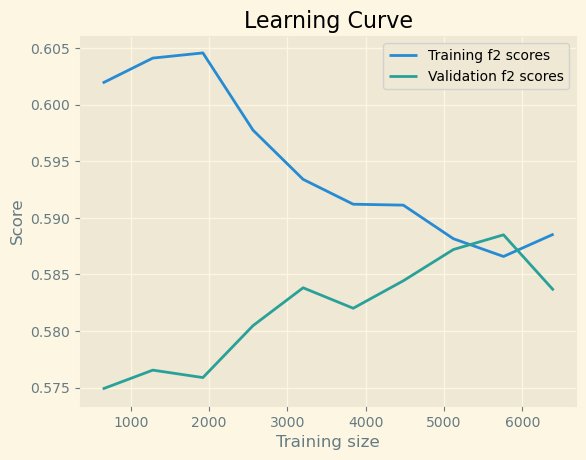

Average training f2-score on 5-fold cv: 0.588558228437382
Average validation f2-score on 5-fold cv: 0.5835995037358648


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

model = LogisticRegression(class_weight='balanced', random_state=random_state)
scaler = RobustScaler()

pipe = make_pipeline(scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

Our model suffers from sever underfitting, changing from ordinal encoding to one-hot encoding may slightly improve the performance of our model

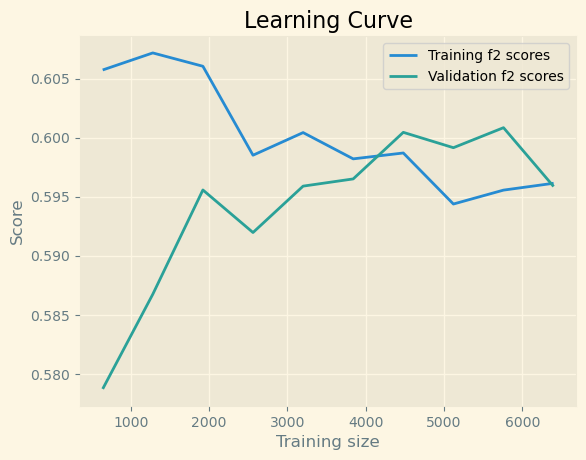

Average training f2-score on 5-fold cv: 0.5961373107873281
Average validation f2-score on 5-fold cv: 0.5958648908510692


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

scaler = RobustScaler()
model = LogisticRegression(class_weight='balanced', random_state=random_state)

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

Although the model has better performance with one-hot encoding, it still suffers from overfitting. One of the ways to deal with this problem is to increase the number of features. However, we can't just go and collect more data. That's where **feature engineering** comes into play!

### Feature Engineering:
Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering is required when working with machine learning models. Regardless of the data or architecture, a terrible feature will have a direct impact on your model.

In [24]:
X_train_preprocessed.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686          0       0   32       6       0.00              2   
1561          632          1       0   42       4  119624.60              2   
1670          559          2       0   24       3  114739.92              1   
6087          561          0       1   27       9  135637.00              1   
6669          517          0       0   56       9  142147.32              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
9254          1               1        179093.26  
1561          1               1        195978.86  
1670          1               0         85891.02  
6087          1               0        153080.40  
6669          0               0         39488.04

For example, we can add as a new feature Percent Balance (Balance / EstimatedSalary)

In [25]:
X_train_preprocessed['Percent Balance'] = X_train_preprocessed['Balance'] / X_train_preprocessed['EstimatedSalary']
X_train.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  8000.000000  8000.000000  8000.000000    8000.000000    8000.000000   
mean    651.647625    38.897750     5.003875   76102.139645       1.531375   
std      96.366200    10.518953     2.881822   62461.005757       0.579705   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     585.000000    32.000000     3.000000       0.000000       1.000000   
50%     653.000000    37.000000     5.000000   96447.520000       1.000000   
75%     719.000000    44.000000     7.000000  127611.332500       2.000000   
max     850.000000    92.000000    10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  
count  8000.000000     8000.000000      8000.000000  
mean      0.703500        0.512750    100431.289764  
std       0.456743        0.499869     57518.920431  
min       0.000000        0.000000        90.070000  
25%       0.000000        0.000000     51364.125000  
50%       1.000000        1.000000    100487.720000  
75%       1.000000        1.000000    149595.842500  
max       1.000000        1.000000    199970.740000

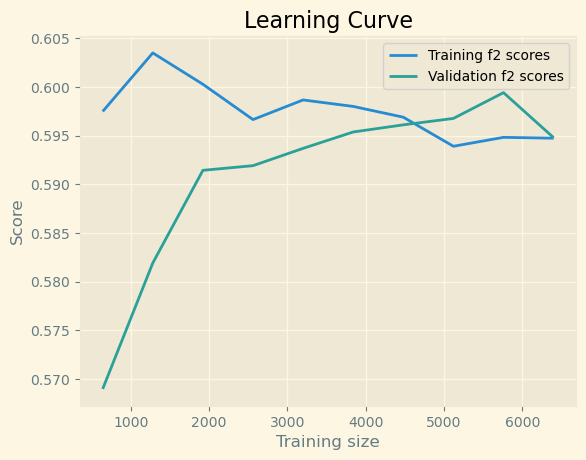

Average training f2-score on 5-fold cv: 0.5947490507777312
Average validation f2-score on 5-fold cv: 0.5948050394379887


In [26]:
oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

scaler = MinMaxScaler()
model = LogisticRegression(random_state=random_state, class_weight='balanced')

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

Let's try adding a boolean feature: HasBalance

In [27]:
X_train_preprocessed = preprocess_data(X_train)
X_train_preprocessed['HasBalance'] = (X_train_preprocessed['Balance'] > 0) * 1
X_train_preprocessed.describe()

CreditScore    Geography       Gender          Age       Tenure  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean    651.647625     0.750125     0.454750    38.897750     5.003875   
std      96.366200     0.828416     0.497979    10.518953     2.881822   
min     350.000000     0.000000     0.000000    18.000000     0.000000   
25%     585.000000     0.000000     0.000000    32.000000     3.000000   
50%     653.000000     1.000000     0.000000    37.000000     5.000000   
75%     719.000000     1.000000     1.000000    44.000000     7.000000   
max     850.000000     2.000000     1.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    8000.000000    8000.000000  8000.000000     8000.000000   
mean    76102.139645       1.531375     0.703500        0.512750   
std     62461.005757       0.579705     0.456743        0.499869   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     96447.520000       1.000000     1.000000        1.000000   
75%    127611.332500       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary  HasBalance  
count      8000.000000  8000.00000  
mean     100431.289764     0.63525  
std       57518.920431     0.48139  
min          90.070000     0.00000  
25%       51364.125000     0.00000  
50%      100487.720000     1.00000  
75%      149595.842500     1.00000  
max      199970.740000     1.00000

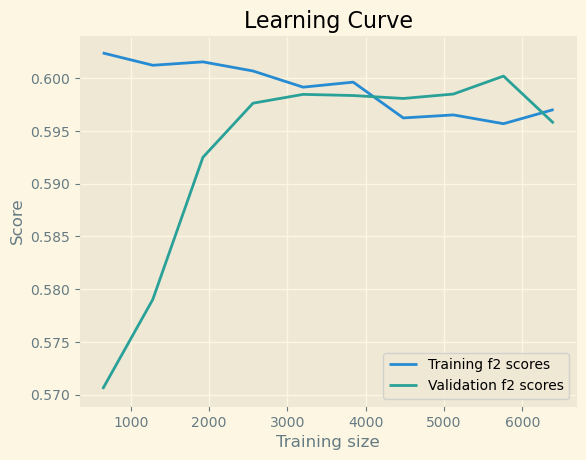

Average training f2-score on 5-fold cv: 0.5970274779738111
Average validation f2-score on 5-fold cv: 0.5957368838626282


In [28]:
oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

scaler = MinMaxScaler()
model = LogisticRegression(random_state=random_state, class_weight='balanced')

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

Both features did not change the performance of the model significantly

Let's try adding some statistical features

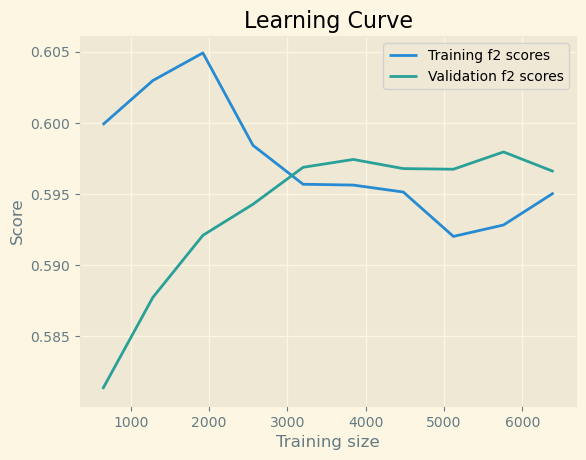

Average training f2-score on 5-fold cv: 0.5950788673956794
Average validation f2-score on 5-fold cv: 0.5965824460813715


In [29]:
X_train_preprocessed['mean'] = X_train_preprocessed.mean(axis=1)
X_train_preprocessed['std'] = X_train_preprocessed.std(axis=1)

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

scaler = RobustScaler()
model = LogisticRegression(random_state=random_state, class_weight='balanced')

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

scikit-learn offers an easy way for feature engineering: PolynomialFeatures

In [30]:
# Let's use grid search cv to search for the best PolynomialFeatures degree value
from sklearn.preprocessing import PolynomialFeatures

X_train_preprocessed.drop(['mean', 'std'], axis=1, inplace=True)

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

scaler = MinMaxScaler()
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=random_state)

pipe = make_pipeline(encoder, PolynomialFeatures(degree=2), scaler, model)
param_grid = {'polynomialfeatures__degree': range(2, 5)}

grid_search = GridSearchCV(pipe, param_grid, scoring=f2_scorer, return_train_score=True, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_preprocessed, y_train)
print(f'Best params: {grid_search.best_params_}')
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_train_preprocessed, y_train, plot=False)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'polynomialfeatures__degree': 4}
Average training f2-score on 5-fold cv: 0.7234974137156287
Average validation f2-score on 5-fold cv: 0.6720186799657413


## Support Vector Machine

SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages.  It can handle both classification and regression on **linear** and **non-linear** data.
The advantages of support vector machines are: **Effective in high dimensional spaces**. Still effective in cases where **number of dimensions is greater than the number of samples**.

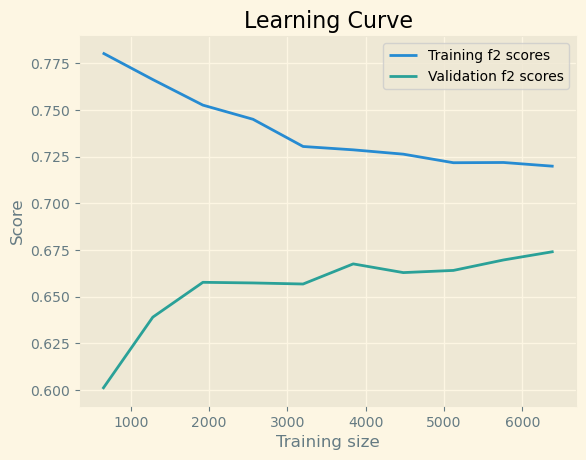

Average training f2-score on 5-fold cv: 0.7198556224319078
Average validation f2-score on 5-fold cv: 0.6741699397798617


In [31]:
from sklearn.svm import SVC

X_train_preprocessed = preprocess_data(X_train)

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

model = SVC(class_weight='balanced', random_state=random_state)
scaler = RobustScaler()

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train)

SVM gave us the best performance yet with minimal work!

Let's try adding the HadBalance feature

In [32]:
X_train_preprocessed['HasBalance'] = (X_train_preprocessed['Balance'] > 0) * 1

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

model = SVC(class_weight='balanced', random_state=random_state)
scaler = RobustScaler()

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train, plot=False)

Average training f2-score on 5-fold cv: 0.7237806924251818
Average validation f2-score on 5-fold cv: 0.6741720363731629


Don't use polynomial features with svm! Instead you can change svm's kernel

In [33]:
X_train_preprocessed = preprocess_data(X_train)

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

model = SVC(kernel='poly', degree=3, class_weight='balanced', random_state=random_state)
scaler = RobustScaler()

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train, plot=False)

Average training f2-score on 5-fold cv: 0.6961119372354497
Average validation f2-score on 5-fold cv: 0.6565444117462731


## Ensembling
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.

One of the simpler ensembling methods is averaging the predictions of multiple models

In [34]:
from sklearn.ensemble import VotingClassifier

def get_svm_model():
    oh_encoder = OneHotEncoder()
    encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

    model = SVC(class_weight='balanced', random_state=random_state, probability=True)
    scaler = RobustScaler()

    pipe = make_pipeline(encoder, scaler, model)
    return pipe

tree_model = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
svm_model = get_svm_model()

voting_model = VotingClassifier([('decision tree', tree_model), ('svc', svm_model)], voting='soft')

evaluate_model(voting_model, X_train_preprocessed, y_train, plot=False)

Average training f2-score on 5-fold cv: 0.6610923153846137
Average validation f2-score on 5-fold cv: 0.5994176909787596


### Random Forest
The random forest is a classification/regression algorithm consisting of many decisions trees. It uses **bagging** and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

Bagging is usually applied where the classifier is unstable and has a high variance.

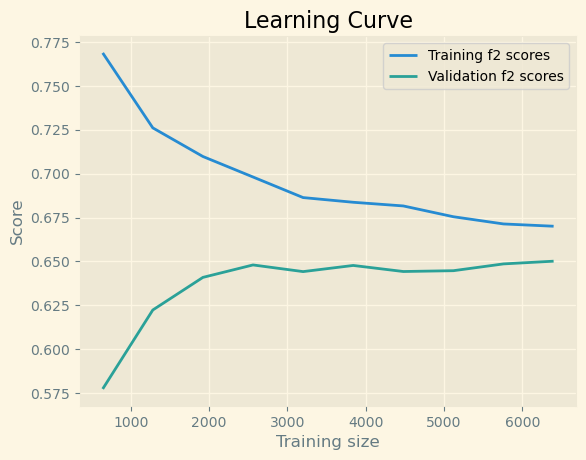

Average training f2-score on 5-fold cv: 0.6700000615585366
Average validation f2-score on 5-fold cv: 0.6500779750755741


In [35]:
from sklearn.ensemble import RandomForestClassifier

X_train_preprocessed = preprocess_data(X_train)

model = RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=random_state)

evaluate_model(model, X_train_preprocessed, y_train)

Increasing the number of decision trees may increase the performance

In [36]:
from sklearn.ensemble import RandomForestClassifier

X_train_preprocessed = preprocess_data(X_train)

model = RandomForestClassifier(n_estimators=500, max_depth=5, class_weight='balanced', random_state=random_state)

evaluate_model(model, X_train_preprocessed, y_train, plot=False)

Average training f2-score on 5-fold cv: 0.6723688287102362
Average validation f2-score on 5-fold cv: 0.6534778793230085


Our best model is Support Vector Machine with HasBalance feature, One hot encoding, robust scaling and class_weight='balanced'

In [37]:
X_train_preprocessed['HasBalance'] = (X_train_preprocessed['Balance'] > 0) * 1

oh_encoder = OneHotEncoder()
encoder = make_column_transformer((oh_encoder, ['Geography']), remainder='passthrough')

model = SVC(class_weight='balanced', random_state=random_state)
scaler = RobustScaler()

pipe = make_pipeline(encoder, scaler, model)

evaluate_model(pipe, X_train_preprocessed, y_train, plot=False)

pipe.fit(X_train_preprocessed, y_train)

Average training f2-score on 5-fold cv: 0.7237806924251818
Average validation f2-score on 5-fold cv: 0.6741720363731629


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Geography'])])),
                ('robustscaler', RobustScaler()),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [38]:
X_test_preprocessed['HasBalance'] = (X_test_preprocessed['Balance'] > 0) * 1

train_prediction = pipe.predict(X_train_preprocessed)
test_prediction = pipe.predict(X_test_preprocessed)

In [39]:
train_f2 = f2_score(y_train, train_prediction)
test_f2 = f2_score(y_test, test_prediction)

print(f'f2-score on the training set: {train_f2}')
print(f'f2-score on the testing _set: {test_f2}')

f2-score on the training set: 0.7205604358945846
f2-score on the testing _set: 0.6772727272727272


In [40]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.76      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



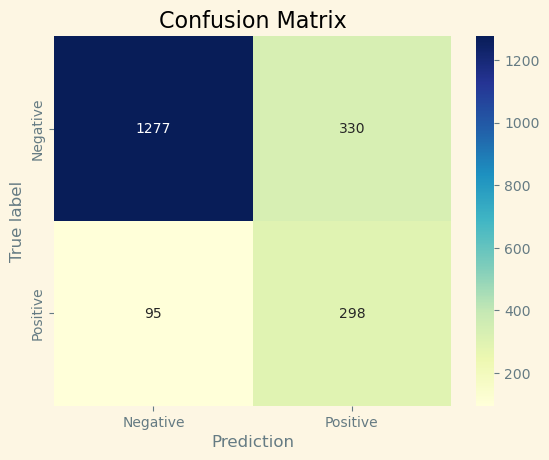

In [41]:
matrix = confusion_matrix(y_test, test_prediction)
matrix = pd.DataFrame(matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

sns.heatmap(matrix, annot=True, fmt='', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Export scikit-learn's pipeline

In [42]:
import pickle
import os

model_dir = 'my_model'
if not os.path.isdir(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '\\svm_pipeline.pkl'

with open(model_path, 'wb') as model_file:
    pickle.dump(pipe, model_file)

## Load and use scikit-learn's pipeline

In [43]:
with open(model_path, 'rb') as model_file:
    pipe = pickle.load(model_file)

Remember that before inputing data to our pipeline, we need to use the same preprocessing steps we used before.

In [44]:
def preprocess_pipeline_input(data):
    preprocessed_data = data.copy()
    preprocessed_data['Geography'] = preprocessed_data['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
    preprocessed_data['Gender'] = preprocessed_data['Gender'].map(lambda gender: (gender == 'Female') * 1)
    preprocessed_data['HasBalance'] = (preprocessed_data['Balance'] > 0) * 1
    return preprocessed_data

In [45]:
X_test_preprocessed = preprocess_pipeline_input(X_test)
test_prediction = pipe.predict(X_test_preprocessed)
train_f2 = f2_score(y_train, train_prediction)
test_f2 = f2_score(y_test, test_prediction)

print(f'f2-score on the training set: {train_f2}')
print(f'f2-score on the testing _set: {test_f2}')

f2-score on the training set: 0.7205604358945846
f2-score on the testing _set: 0.6772727272727272
